# ch 10_9 기대 빈도와 관측 빈도 

기대 빈도와 관측 빈도로 들어가기 앞서서 먼저 포아송 분포를 짚어보겠습니다.  

## 포아송 분포
정해진 시간 안에 어떤 사건이 일어날 횟수에 대한 기댓값을  λ 라고 했을 때, 그 사건이  n 회 일어날 확률은 다음과 같습니다.

$$f(x;\lambda)=\frac{\lambda^ne^{-\lambda}}{n!}$$

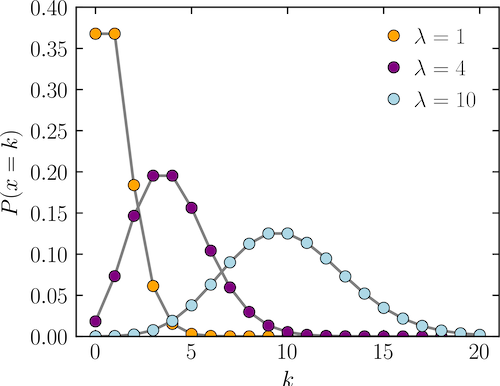

다른 분포들과 마찬가지로 수식에 겁먹을 필요가 전혀 없습니다. 다만, 분포의 형태를 결정짓는 것이 무엇인지만 알면 됩니다. 포아송 분포는 그리스 문자로 L을 나타내는 λ(람다)라는 수에 의해서 형태가 결정됩니다. λ는 특정 시간 내에 어떤 사건이 일어날 횟수에 대한 기대값을 의미합니다. 

예를 들어 어떤 공장에서 1시간 동안 발생할 불량품의 수가 5개라면, 실제로 발생하는 불량품의 수는 λ가 5인 포아송 분포를 따르게 됩니다. 이를 정규 분포에 빗대어 생각하면 쉽습니다. 1시간에 발생하는 불량품의 기대값이 5라면, 실제로 발생하는 불량품의 수는 5를 중심으로 정규 분포와 유사한 분포를 띄겠죠? 그런데 정규 분포는 연속 확률 변수에 대한 분포이니, 이산 확률 변수에 대응되는 확률 분포가 포아송 분포입니다.

포아송 분포의 평균과 분산은 모두 λ입니다. 유도 과정이 궁금하신 분들은 아래 링크를 참고해주세요.  
포아송 분포의 평균과 분산 유도: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=yunjh7024&logNo=220826152660

### 포아송 분포 예제
*Q. 보험사 A는 2000건의 보험 계약을 가지고 있다. 이 보험을 계약한 사람이 보험을 청구할 확률이 0.001이라고 할 때 포아송 근사를 이용하여 다음 확률을 구하시오.*

1) 보험 청구가 한번도 없을 확률
2) 보험 청구가 3번 이하일 확률

풀이)  
보험 청구의 기대값: 2000 * 0.001 = 2  
1. 보험 청구가 한번도 없을 확률
$$n=0,\;\lambda=2$$
$$f(0;2)=\frac{2^0e^-2}{0!}\approx0.1353$$

2. 보험 청구가 2번 이하일 확률
$$\sum_{i=0}^2f(i;2) = \left(\frac{2^0\times e^{-2}}{0!}+\frac{2^1\times e^{-2}}{1!}+\frac{2^2\times e^{-2}}{2!}\right)\approx0.8571$$

### 포아송 분포의 활용

포아송 분포는 다음과 같은 확률적인 문제를 알아내기 위해 쓰입니다.
- 일정 주어진 시간 동안에 도착한 고객의 수
- 1킬로미터 도로에 있는 흠집의 수
- 일정 주어진 생산시간 동안 발생하는 불량 수
- 하룻동안 발생하는 출생자 수
- 어떤 시간 동안 톨게이트를 통과하는 차량의 수
- 어떤 페이지 하나를 완성하는 데 발생하는 오타의 발생률
- 어떤 특정 량의 방사선을 DNA에 쬐였을 때 발생하는 돌연변이의 수
- 어떤 특정 면적의 다양한 종류의 나무가 섞여 자라는 삼림에서 소나무의 수
- 어떤 특정 진도 이상의 지진이 발생하는 수

### 연습 문제

*Q1. 어느 전공 책 5 페이지를 검사하였는데 오타가 총 10개 발견되었다고 한다. 이 책에서 어느 한 페이지를 검사했을 때, 오타가 3개 나올 확률을 구하시오*

$$f(x;\lambda)=\frac{\lambda^ne^{-\lambda}}{n!}$$

𝜆 = 2, n=3

In [2]:
import numpy as np
from math import factorial

def poisson_prob(lambda_, n):
    return ((lambda_ ** n) * np.exp(-lambda_)) / factorial(n)

In [3]:
poisson_prob(lambda_=2, n=3)

0.1804470443154836

*Q2. 어느 택배 회사 상담실에 1시간당 평균 240건의 전화 요청이 들어온다고 한다. 1분당 걸려오는 전화 요청이 2건 이하일 확률을 구하시오*

𝜆=4, n=0 or n=1 or n=2

In [4]:
total_prob = 0

for i in range(3):
    total_prob += poisson_prob(lambda_=4, n=i)
print(total_prob)

0.2381033055535443


## 기대 빈도와 관측 빈도

사실 포아송 분포를 살펴본 이유는 카테고리형 변수의 관측 빈도가 포아송 분포를 따르기 때문입니다. 먼저 아래와 같이 범주형 변수만으로 이루어진 데이터가 주어졌다고 가정하겠습니다.

| 성별 | M | F | F | M | F | F | M | F | F | M | M | M | F | F | M | M | M | F | F | M |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 혈액형 | A | B | B | O | O | A | AB | A | B | B | B | B | B | A | O | A | O | AB | A | B |

성별과 혈액형 데이터를 가지고, 두 변수가 서로 독립인지, 아니면 연관성이 있는지를 검정하고 싶습니다. 이 때, 카이 제곱 검정을 사용할 수 있는데, 이를 위해선 먼저 기대 빈도와 관측 빈도를 집계해야 합니다. 그리고 관측 빈도가 포아송 분포를 따르는지를 확인해보겠습니다.

### 분할표
먼저 특정 범주가 등장하는 빈도 수를 집계하여 표 형식으로 만들어보겠습니다. 이를 분할표(contingency table)을 만들어야 합니다.
|  | A | B | O | AB | 합 |
| --- | --- | --- | --- | --- | --- |
| F | 4 | 4 | 1 | 1 | 10 |
| M | 2 | 4 | 3 | 1 | 10 |
| 합 | 6 | 8 | 4 | 2 | 20 |

확률로 표현하면 아래와 같습니다. 이를 상대 도수 분할표로라고 부릅니다(relative frequency contigency table). 
|  | A | B | O | AB | 합 |
| --- | --- | --- | --- | --- | --- |
| F | 0.2 | 0.2 | 0.05 | 0.05 | 0.5 |
| M | 0.1 | 0.2 | 0.15 | 0.05 | 0.5 |
|합|0.3|0.4|0.2|0.1|20|

$$P(F)=\frac{10}{20}=0.5$$

$$P(A)=\frac{6}{20}=0.3$$

### 기대 빈도 계산
만약 성별과 혈액형이 서로 독립이라면 여성임과 동시에 A형일 확률은 각 확률의 곱입니다.

$$\text{A와 F가 독립이라고 가정하면}$$

$$P(A \cap F)=P(A)P(F)=0.5*0.3=0.15$$

두 변수가 독립임을 가정하고 구한 결합 확률을 전체 빈도 수에 곱한 값이 기대 빈도가 됩니다.

$$기대빈도\;E_{AF}=P(A)P(B)*n=0.15*20=3$$

이런 식으로 분할표 상의 모든 값들의 기대 빈도를 구하여 괄호 안에 표기해주면 아래와 같습니다.

|  | A | B | O | AB | 합 |
| --- | --- | --- | --- | --- | --- |
| F | 4(3) | 4(4) | 1(2) | 1(1) | 10 |
| M | 2(3) | 4(4) | 3(2) | 1(1) | 10 |

### 기대 빈도 구하기
만약 성별과 혈액형이 서로 독립이라면 여성임과 동시에 A형일 확률은 여성일 확률 x A 형일 확률이 됩니다. 

$$\text{A와 F가 독립이라고 가정하면}$$
$$P(A \cap F)=P(A)P(F)=0.5*0.3=0.15$$

이렇게 두 변수가 독립임을 가정하고 구한 결합 확률을 전체 빈도 수에 곱한 값이 기대 빈도가 됩니다.

$$기대빈도\;E_{AF}=P(A)P(B)*n=0.15*20=3$$

이런 식으로 분할표 상의 모든 값들의 기대 빈도를 구하여 괄호 안에 표기해주면 아래와 같습니다.

|  | A | B | O | AB | 합 |
| --- | --- | --- | --- | --- | --- |
| F | 4(3) | 4(4) | 1(2) | 1(1) | 10 |
| M | 2(3) | 4(4) | 3(2) | 1(1) | 10 |
| 합 | 6 | 8 | 4 | 2 | 20 |

기대 빈도와 일치하는 값도 있고, 그렇지 않은 값도 있습니다. 이 표만 보고 두 변수는 독립이라고 얘기할 수 있을까요? 이를 통계적으로 검정하기 위해서 먼저 가설을 세워보겠습니다.

### 관측 빈도의 확률 분포

두 변수가 독립임을 가정했을 때, 관측 빈도는 𝜆가 기대 빈도인 포아송 분포를 따릅니다. 이를 이용해 각각의 관측 빈도가 발생할 확률을 계산해보겠습니다.

$$P(O_{FA}=4)=f(4;3)=\frac{3^4e^{-3}}{4!}\approx0.1680$$

즉, 혈액형이 A형이면서 여성일 확률은 기대값이 3인 포아송 분포를 따르고, 이 때, 관측 빈도가 4가 발생할 확률은 0.1680이 됩니다.

## 관측 빈도 포아송 분포 시뮬레이션

실제 데이터 셋을 활용하여 관측 빈도가 포아송 분포를 따르는 지를 확인해보겠습니다.

In [6]:
import pandas as pd
from scipy import stats 

In [7]:
df = pd.read_csv("./data/diamonds.csv")
df = df[["cut", "clarity", "color"]]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cut      53940 non-null  object
 1   clarity  53940 non-null  object
 2   color    53940 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [9]:
df.isnull().sum()

cut        0
clarity    0
color      0
dtype: int64

1000개만 샘플링하여 기대 빈도를 계산한 다음, 시뮬레이션을 돌려보겠습니다.

In [10]:
sampled_df = df.sample(1000, random_state=1234)

### 분할표 생성

In [11]:
pd.crosstab(sampled_df["cut"], sampled_df["clarity"])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,7,0,7,11,1,7,0,0
Good,3,2,27,20,7,19,4,8
Ideal,2,17,88,50,78,102,31,53
Premium,3,2,49,69,37,65,7,20
Very Good,0,4,59,35,22,50,14,20


In [12]:
contigency_table = pd.crosstab(sampled_df["cut"], sampled_df["clarity"],  margins=True, normalize=True)

In [13]:
contigency_table

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,All
cut,,,,,,,,,
Fair,0.007,0.000,0.007,0.011,0.001,0.007,0.000,0.000,0.033
Good,0.003,0.002,0.027,0.020,0.007,0.019,0.004,0.008,0.090
Ideal,0.002,0.017,0.088,0.050,0.078,0.102,0.031,0.053,0.421
Premium,0.003,0.002,0.049,0.069,0.037,0.065,0.007,0.020,0.252
Very Good,0.000,0.004,0.059,0.035,0.022,0.050,0.014,0.020,0.204
All,0.015,0.025,0.230,0.185,0.145,0.243,0.056,0.101,1.000


### 기대 빈도 측정

cut이 Ideal일 사건과 clarity가 VS2일 사건이 독립 사건이라고 가정하고, 결합 확률과 기대 빈도를 측정해보겠습니다.

$$P(cur=Ideal)=0.421$$

$$P(clarity=VS2)=0.243$$

$$\text{두 사건이 독립임을 가정했을 때}$$
$$P(Ideal \cap VS2)\approx0.1023$$

$$E_{Ideal,VS2}=0.1023*1000\approx102.3$$

In [14]:
join_prob = 0.421 * 0.243
expected_freq = join_prob * 1000
print("join prob", join_prob)
print("expected freq", expected_freq)

join prob 0.10230299999999999
expected freq 102.303


In [15]:
pd.crosstab(sampled_df["cut"], sampled_df["color"],  margins=True, normalize=True)

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Fair,0.002,0.004,0.006,0.005,0.009,0.003,0.004,0.033
Good,0.011,0.025,0.014,0.017,0.011,0.010,0.002,0.090
Ideal,0.055,0.067,0.072,0.099,0.063,0.048,0.017,0.421
Premium,0.026,0.047,0.043,0.053,0.047,0.021,0.015,0.252
Very Good,0.024,0.046,0.038,0.043,0.020,0.021,0.012,0.204
All,0.118,0.189,0.173,0.217,0.150,0.103,0.050,1.000


### 연습문제

*Q1. cut과 color 변수의 분할표와 상대 도수 분할표를 그려보세요.*

*Q2. cut이 Premium일 사건과 color가 G일 사건이 독립임을 가정하고, 기대 빈도를 구해보세요.*

### 포아송 분포 시각화
기대 빈도를 λ로 설정하여 포아송 분포를 그려보겠습니다.

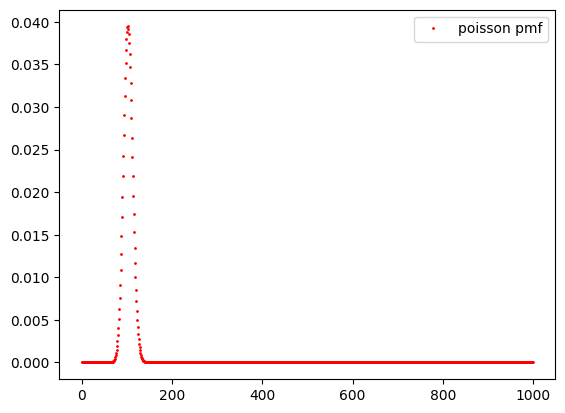

In [16]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(0, 1000, 1)
mu = expected_freq
plt.plot(x, stats.poisson.pmf(x, mu), 'ro', ms=1, label='poisson pmf')
plt.legend()

 기대 빈도를 중심으로 정규 분포와 유사한 모양을 띄는 것을 알 수 있습니다.

### 시뮬레이션

이제 데이터 셋에서 무작위로 샘플링을 하여 빈도 수를 집계한 다음, 히스토그램을 그려보겠습니다. 이것이 앞서 그린 포아송 분포를 따라가는지 확인해보겠습니다.

In [17]:
from tqdm import tqdm

observed_freq_list = []
sample_size = 100
for i in tqdm(range(1000)):
    cur_df = sampled_df.sample(sample_size)
    observed_freq = len(cur_df[(cur_df["cut"]=="Ideal") & (cur_df["clarity"]=="VS2")])
    observed_freq_list.append(observed_freq)

100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4393.12it/s]


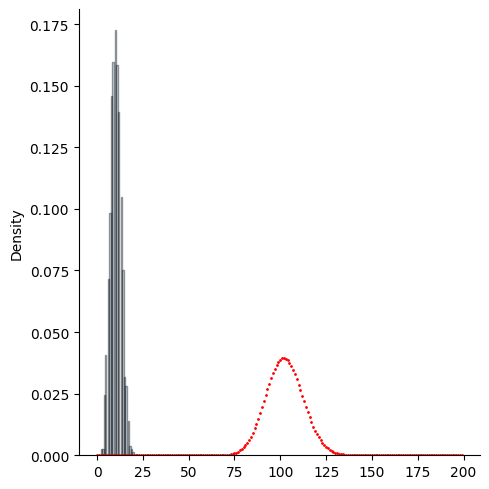

In [18]:
import seaborn as sns

x = np.arange(0, 200, 1)
sns.displot(
    observed_freq_list,
    stat="density",
    alpha=0.2, 
    edgecolor=(0, 0, 0, 0.4),
)
plt.plot(x, stats.poisson.pmf(x, mu), 'ro', ms=1, label='poisson pmf')

## 정리
이번 챕터에서는 포아송 분포의 개념에 대해서 알아보았습니다. 그리고 범주형 데이터를 기대 빈도와 관측 빈도로 표현하고, 포아송 분포를 이용해서 관측 빈도가 발생할 확률을 계산하는 작업을 해보았습니다. 만약 두 변수가 완벽히 독립이라면, 관측 빈도가 포아송 분포를 따라갈 것이라는 걸 예측해볼 수 있었고, 시뮬레이션도 해보았습니다.

자 그런데 위 그림을 보면 독립을 가정했을 때의 분포가 실제 분포와 살짝 어긋나 보입니다. 그렇다면 얼마나 어긋나야 독립이 아닐까요? 혹은 얼마까지는 허용 가능한 범위일까요? 이를 위해 필요한 것이 카이 제곱 검정이며, 자세한 내용은 다음 챕터에서 알아보겠습니다.